### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data_df = pd.read_csv("Data.csv")
user_df = pd.read_csv("user.csv")
item_df = pd.read_csv("item.csv")

In [3]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [4]:
#data dataframe details
print("Details of Data DF")
print("Info:")
data_df.info()  #info
print("Shape:",data_df.shape) #shape 
print("Describe:") #describe
print(data_df.describe())
print("No. of missing values in data dataframe: ",data_df.isnull().sum().sum())


Details of Data DF
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
Shape: (100000, 4)
Describe:
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
No. of missing values in data dataframe:  0


In [5]:
#user dataframe details
print("User details")
print("Info:")
user_df.info()  #info
print("Shape:",user_df.shape) #shape 
print("Describe:") #describe
print(user_df.describe())
print("No. of missing values in data dataframe: ",user_df.isnull().sum().sum())


User details
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB
Shape: (943, 5)
Describe:
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
No. of missing values in data dataframe:  0


In [6]:
#item dataframe details
print("Item DF details")
print("Info:")
item_df.info()  #info
print("Shape:",item_df.shape) #shape 
print("Describe:") #describe
print(item_df.describe())
print("No. of missing values in data dataframe: ",item_df.isnull().sum().sum())


Item DF details
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB
Shape: (1681, 22)
Descri

No missing values in all three dataframes

#### 4. Find the number of movies per genre using the item data - 5 marks

In [7]:
# use sum on the default axis
item_df.sum(numeric_only=True)

movie id       1415136
unknown              1
Action             251
Adventure          135
Animation           42
Childrens          122
Comedy             505
Crime              109
Documentary         50
Drama              725
Fantasy             22
Film-Noir           24
Horror              92
Musical             56
Mystery             61
Romance            247
Sci-Fi             101
Thriller           251
War                 71
Western             27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [8]:
#hint: use sum on the axis = 1
item_df1 = item_df.copy()
item_df1['sum_genre']=item_df.drop('movie id', axis=1).sum(axis=1)#using drop method
item_df1.where(item_df1['sum_genre'] > 1).dropna()[['movie id','movie title','sum_genre']]

#using above method wecan find by its location as well
#item_df.iloc[:,1:].sum(axis=1) #using location

,movie id,movie title,sum_genre
0,1.0,Toy Story,3.0
1,2.0,GoldenEye,3.0
3,4.0,Get Shorty,3.0
4,5.0,Copycat,3.0
6,7.0,Twelve Monkeys,2.0
7,8.0,Babe,3.0
9,10.0,Richard III,2.0
10,11.0,Seven (Se7en),2.0
11,12.0,"Usual Suspects, The",2.0
13,14.0,"Postino, Il",2.0


In [9]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [10]:
indexval = item_df[item_df.unknown ==1].index
item_df.drop(indexval,inplace=True)

In [11]:
item_df[item_df.unknown ==1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [12]:
# HINT: use distplot for age, release date and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below

In [13]:
a = 'My*cat*is*brown'
a
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

#print(a[10:])
#print(a[-5:])

brown


In [14]:
# Univariant - distplot : year in release date
val = item_df['release date'].str.split("-", n=0,expand=True)
release_year = val[2]
item_df['release_year'] = release_year
item_df['release_year']=item_df['release_year'].astype(int)

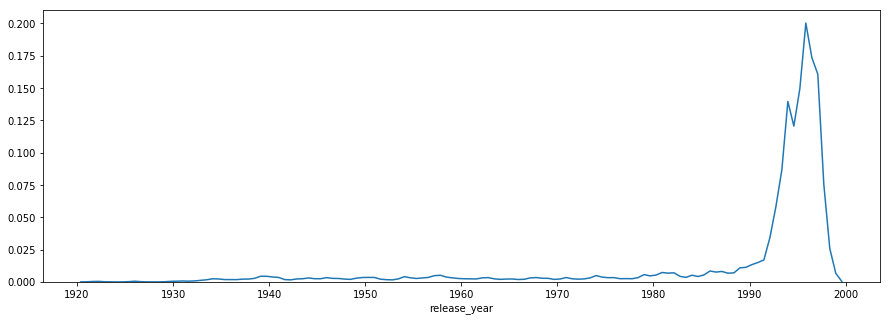

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(item_df['release_year'], ax=ax ,bins = 50, hist=False)

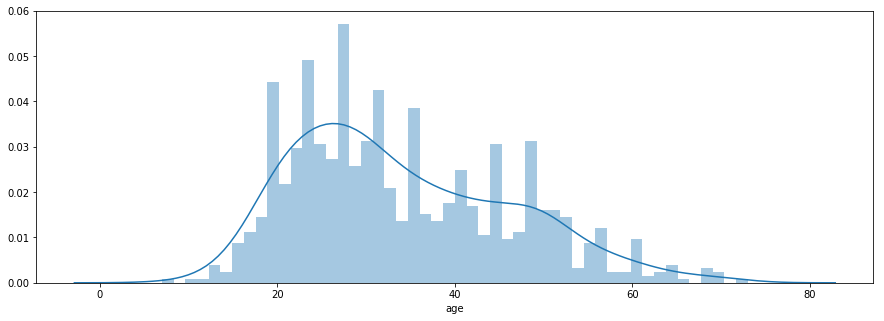

In [16]:
# Univariant - distplot : age
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(user_df['age'], ax=ax ,bins = 50)

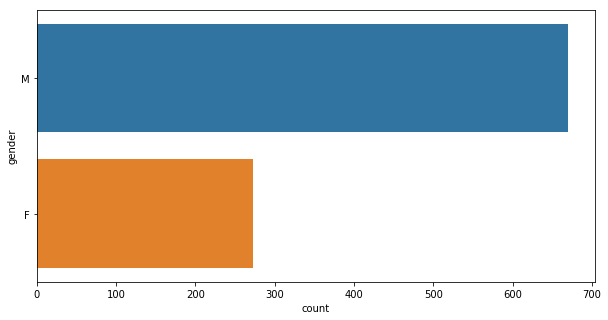

In [29]:
#Univariate plot - countplot: gender
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(y='gender', data= user_df)

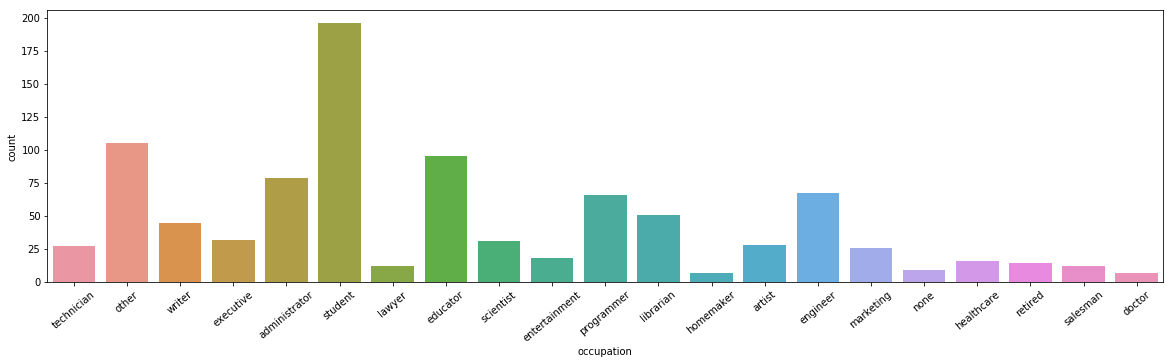

In [27]:
#Univariate plot - countplot: occupation
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=40)  #rotate the x axis labels
sns.countplot(x='occupation', data = user_df)

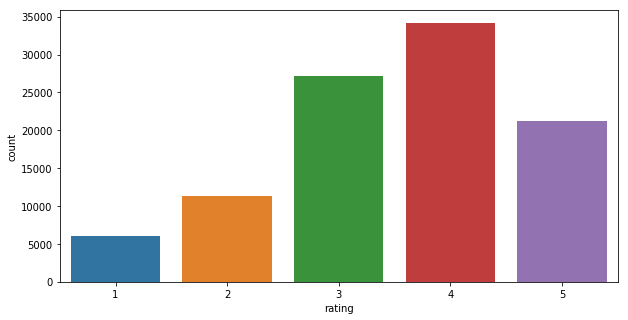

In [19]:
#Univariate plot - countplot: ratings
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data_df['rating'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [20]:
#Your answer here
item_df.columns

item_df2 = item_df.groupby(['release_year'])['Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'].sum()

item_df2

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1933,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1934,0,0,0,0,2,0,0,1,0,0,0,1,1,1,0,0,0,0
1935,0,0,0,0,2,0,0,0,0,0,1,1,0,1,0,1,0,0
1936,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


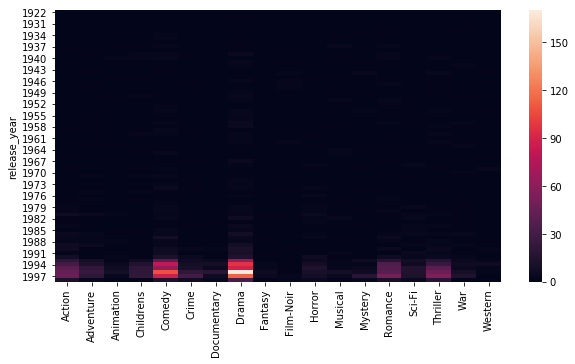

In [21]:
fig,ax = plt.subplots(figsize=(10,5))   
sns.heatmap(item_df2, ax=ax)

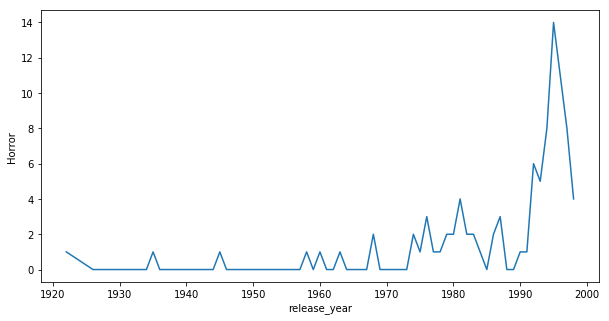

In [22]:
fig,ax = plt.subplots(figsize=(10,5))   
sns.lineplot(x=item_df2.index,y=item_df2['Horror'], ax=ax)

### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [50]:
#your answer here
#First find the movies that have more than 100 ratings(use merge, groupby and count). 
#Extract the movie titles in a list.
data_rat = data_df.groupby(['movie id'], as_index =False)['rating'].count()
data_rat1 = data_rat[data_rat['rating']>=100]
q1_df = pd.merge(data_rat1,item_df[['movie id', 'movie title']],how='inner',on='movie id',sort=True)
q1_list = q1_df['movie title'].to_numpy().tolist()

#Find the average rating of all the movies and sort them in the descending order. 
#You will have to use the .merge() function to reach to a data set through which you can get the names and the average 
#rating.
data_rat2 = (data_df.groupby(['movie id'], as_index =False)['rating'].mean()).rename(columns={"rating":"avg_rat"})
data_rat2.sort_values(by='avg_rat',inplace=True,ascending=False)
q2_df = pd.merge(data_rat2,movie_list[['movie title','movie id']],how='inner',on='movie id')

#Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
q2_df[['movie id','movie title', 'avg_rat']][q2_df['movie title'].isin(q1_list)].head(25)

,movie id,movie title,avg_rat
15,408,"Close Shave, A",4.491071
16,318,Schindler's List,4.466443
17,169,"Wrong Trousers, The",4.466102
18,483,Casablanca,4.456790
20,64,"Shawshank Redemption, The",4.445230
21,603,Rear Window,4.387560
22,12,"Usual Suspects, The",4.385768
23,50,Star Wars,4.358491
24,178,12 Angry Men,4.344000
28,134,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [24]:
item_df.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year'],
      dtype='object')

In [25]:
gen_df1 = pd.merge(data_df[['user id','movie id','rating']], user_df[['user id','age','gender']], 
                   on='user id', how='inner')
gen_df1
gen_df2 = pd.merge(gen_df1[['user id','movie id','gender']],
                   item_df[['movie id','Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']],on='movie id', how='inner')
gen_df2.sort_values(by='user id', inplace=True)
gen_df2

gen_df3 = gen_df2.groupby(['gender']).sum()[['Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
gen_df3['total']=gen_df3.sum(numeric_only=True, axis=1)
gen_df3

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


In [26]:
gen_df4 = gen_df3.div(gen_df3.total, axis=0)*100
gen_df4

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


### Men watch more drama than women

1. women total: 53701
2. men total: 158884
3. F-Drama%:20.499
4. M-Drama%:18.18
5. Statement: Women gave 20% of their rating to Drama. So, women watch more drama than men and above statement is false

### Men watch more Romance than women
1. women total: 53701
2. men total: 158884
3. F-Romance%:10.91
4. M-Romance%:8.56
5. Statement: Women gave 10% of their rating to Romance movies. So, women watch more Romance movies than men and above statement is false

### Women watch more Sci-Fi than Men
1. women total: 53701
2. men total: 158884
3. F-Sci-Fi:4.90
4. M-Sci-Fi:6.36
5. Statement: Women gave 4.9% of their rating to Sci-Fi movies. So, women watch more Sci-Fi movies than men and above statement is True.